In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.neighbors import KNeighborsClassifier
from basketball_reference_scraper.players import get_stats

In [170]:
POSITION_TYPES = ['CENTER', 'GUARD', 'FORWARD']
# Centers
centers=[
    'nikola jokic',
    'joel embiid',
    'anthony davis',
    'andre drummond',
    'karl anthony towns',
    'bam adebayo',
    'nikola vucevic',
    'yao ming',
    'rudy gobert',
    'myles turner',
    'hakeem olajuwon',
    'deandre ayton',
    'domantas sabonis',
    'jarrett allen'
]
# Guards
guards=[
    'damian lillard',
    'stephen curry',
    'luka doncic',
    'jamal murray',
    'james harden',
    'fred vanvleet',
    'trae young',
    'allen iverson',
    'jason kidd',
    'steve nash',
    'chris paul',
    'luka doncic',
    'ja morant',
    'ben simmons'
]
# Forwards
forwards=[
    'giannis antetokounmpo',
    'draymond green',
    'pascal siakam',
    'zion williamson',
    'kevin durant',
    'jimmy butler',
    'kawhi leonard',
    'pau gasol',
    'dennis rodman',
    'scottie pippen',
    'jayson tatum',
    'paul george',
    'julius randle',
    'tim duncan',
]
print(len(centers))
print(len(guards))
print(len(forwards))

14
14
14


In [171]:
def fetch_player_career(player):
    career = get_stats(player, stat_type='PER_GAME', playoffs=False, career=False, ask_matches=False)
    
    # Drop rows containing 'Did Not Play' by only returning rows with digits in the "Games Played" field
    career_stats = career[career['G'].apply(lambda x: str(x).replace('.','').isdigit())]
    
    return career_stats

def extract_stats(career_stats):
    '''
    extract_stats() takes a player's stats and returns a numpy array of [PTS, AST, TRB, STL, BLK]
    '''
    total_seasons = len(career_stats)
    ## we take 'per game average' to avoid reporting 
    career_ppg = (sum(career_stats['PTS'].astype(float)) / total_seasons)
    career_ast = (sum(career_stats['AST'].astype(float)) / total_seasons)
    career_trb = (sum(career_stats['TRB'].astype(float)) / total_seasons)
    career_stl = (sum(career_stats['STL'].astype(float)) / total_seasons)
    career_blk = (sum(career_stats['BLK'].astype(float)) / total_seasons)
    
    return np.array([career_ppg, career_ast, career_trb, career_stl, career_blk])
    
def predict_position(stats, clf):    
    position_id = clf.predict(stats)[0]
    position = POSITION_TYPES[position_id]
    return position

In [172]:
careers = []
nba_players = centers + guards + forwards
for player in nba_players:
    print(player)
    careers.append(fetch_player_career(player))

nikola jokic
joel embiid
anthony davis
andre drummond
karl anthony towns
bam adebayo
nikola vucevic
yao ming
rudy gobert
myles turner
hakeem olajuwon
deandre ayton
domantas sabonis
jarrett allen
damian lillard
stephen curry
luka doncic
jamal murray
james harden
fred vanvleet
trae young
allen iverson
jason kidd
steve nash
chris paul
luka doncic
ja morant
ben simmons
giannis antetokounmpo
draymond green
pascal siakam
zion williamson
kevin durant
jimmy butler
kawhi leonard
pau gasol
dennis rodman
scottie pippen
jayson tatum
paul george
julius randle
tim duncan


In [213]:
X_train = np.zeros((42,5))
for i in range(len(careers)):
    X_train[i] = extract_stats(careers[i])
    
y_train = np.array([0]*14 + [1]*14 + [2]*14)

#k = 5 => sqrt 42 = 6.5, however after testing multiple k, 5 returns highest accuracy (also keeping it odd so there are no ties)
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [214]:
more_players = [
    'michael jordan', # 1
    'dikembe mutombo',  # 0
    'russell westbrook',  # 1
    'larry bird',  # 2
    'john stockton',  # 1
    'steven adams',  # 0
    'lamarcus aldridge',  # 2
    'demarcus cousins',  # 0
    'kyrie irving',  # 1
    'christian wood',  # 0
    'khris middleton',  # 2
    'devin booker',  # 1
    'kyle lowry',  # 1
    'dirk nowitzki',  # 2
    'carmelo anthony',  # 2
    'andrew wiggins',  # 2
    'lebron james', # 2
    "al horford",  # 2
    'lonzo ball', # 1
    'magic johnson', # 1
    'mitchell robinson' # 0
]

X_test = np.zeros((len(more_players),5))

for i in range(len(more_players)):
    all_career_stats = fetch_player_career(more_players[i])
    stats = extract_stats(all_career_stats).reshape(1,-1)
    X_test[i] = (stats)

y_test = [1, 0, 1, 2, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0]

In [215]:
correct_pred = 0

for p in range(len(X_test)):
    predicted_position = predict_position(X_test[p].reshape(1,-1), clf)
    actual_position = POSITION_TYPES[y_test[p]]

    if predicted_position == actual_position:
        correct_pred += 1

    print(f'I think {more_players[p]} is a {predicted_position}. He played {actual_position} in his career')

I think michael jordan is a GUARD. He played GUARD in his career
I think dikembe mutombo is a CENTER. He played CENTER in his career
I think russell westbrook is a GUARD. He played GUARD in his career
I think larry bird is a CENTER. He played FORWARD in his career
I think john stockton is a GUARD. He played GUARD in his career
I think steven adams is a CENTER. He played CENTER in his career
I think lamarcus aldridge is a FORWARD. He played FORWARD in his career
I think demarcus cousins is a CENTER. He played CENTER in his career
I think kyrie irving is a GUARD. He played GUARD in his career
I think christian wood is a CENTER. He played CENTER in his career
I think khris middleton is a FORWARD. He played FORWARD in his career
I think devin booker is a GUARD. He played GUARD in his career
I think kyle lowry is a GUARD. He played GUARD in his career
I think dirk nowitzki is a FORWARD. He played FORWARD in his career
I think carmelo anthony is a FORWARD. He played FORWARD in his career
I t

In [216]:
print(f'{100*(correct_pred / len(y_test))}% accuracy')

90.47619047619048% accuracy


    offensive_plays  non_scoring_plays             player
0        151.390133          11.696000     michael jordan
1          8.558700           9.618750    dikembe mutombo
2        192.616071           4.050498  russell westbrook
3        149.149349          13.367061         larry bird
4        136.283186           1.318587      john stockton
5         14.122840           6.775361       steven adams
6         34.860648           5.702524  lamarcus aldridge
7         49.842561          10.886345   demarcus cousins
8        135.074876           2.215050       kyrie irving
9          9.158750           1.885453     christian wood
10        59.805200           0.948787    khris middleton
11       112.404898           0.952945       devin booker
12        81.458765           1.487791         kyle lowry
13        47.017982           4.728468      dirk nowitzki
14        59.550612           3.118356    carmelo anthony
15        52.046000           3.538094     andrew wiggins
16       199.7

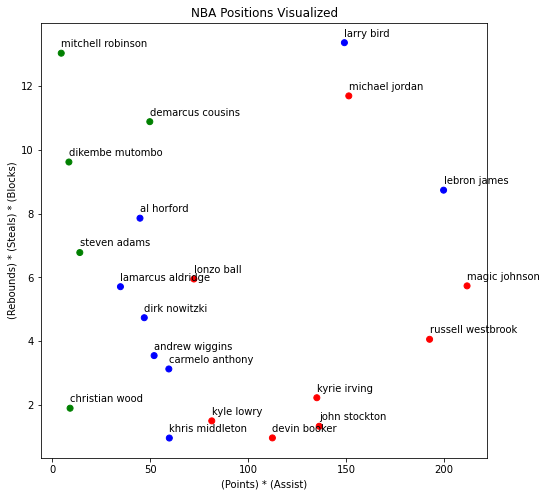

In [217]:
offensive_plays = np.array([X_test[:,0]*X_test[:,1]]).reshape(-1,1)  # points * assists
non_scoring_plays = np.array([X_test[:,2]*X_test[:,3]*X_test[:,4]]).reshape(-1,1)  # rebounds * blocks * steals
plot_2d = np.concatenate((offensive_plays, non_scoring_plays), axis=1)

# Constructing a dataframe for offensive_plays, non_scoring_plays, player, and position
df = pd.DataFrame(plot_2d, columns = ['offensive_plays','non_scoring_plays'])
df['player'] = more_players
L = [POSITION_TYPES[i] for i in y_test]
print(df)
df['position'] = L

fig, ax = plt.subplots()

# Color-coded scatter plot for non_scoring_plays vs offensive_plays
colors = {'GUARD':'red', 'CENTER':'green', 'FORWARD':'blue'}
ax.scatter(df['offensive_plays'], df['non_scoring_plays'], c=df['position'].map(colors))
plt.gcf().set_size_inches((8, 8))

# Add players names to their plotted points
for i in range(len(df)):
    plt.annotate(df['player'][i], ((df['offensive_plays'][i], df['non_scoring_plays'][i]+.2)))

# Labeling title and axes and legend
plt.title("NBA Positions Visualized")
plt.xlabel("(Points) * (Assist)")
plt.ylabel("(Rebounds) * (Steals) * (Blocks)")
plt.show()